# Decision Tree
Data : white_wine.csv

How :
- Apply decision tree clasification method (max_depth = 2)
    - target : quality (quality > 6 -> Y = 1)
    - features : density alcohol
- Validate model using accuracy in 20% testing data
- Apply scaling and validate the model using accuracy in 20% testing data
- Check the performance: is there any difference whether we applied scaling or not?
- Check the tree: is there any difference whether we applied scaling or not?

In [1]:
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv('white_wine.csv')

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [4]:
import seaborn as sns

In [5]:
wine['label'] = np.where(wine['quality']>6,1,0)

<AxesSubplot:xlabel='density', ylabel='alcohol'>

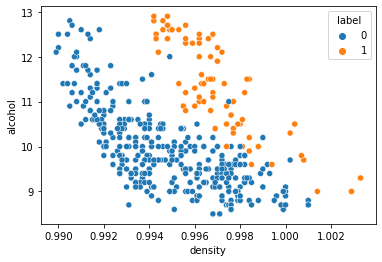

In [6]:
sns.scatterplot(x = 'density', y = 'alcohol', data = wine, hue = 'label')

In [7]:
wine[['alcohol','density']].isnull().sum()

alcohol    1
density    0
dtype: int64

In [8]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace = True)

In [9]:
x = wine[['alcohol','density']]
y = wine['label']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify = y, # stratified random sampling
    test_size = 0.2,
    random_state = 2020) # make the result consistent

# Without Scaling

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
x_train.dropna(inplace=True)

<ipython-input-13-a6e7e73cc9bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.dropna(inplace=True)


In [14]:
tree = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 2
)
tree.fit(x_train,y_train)
y_predict_class = tree.predict(x_test)

In [15]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9519230769230769


In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

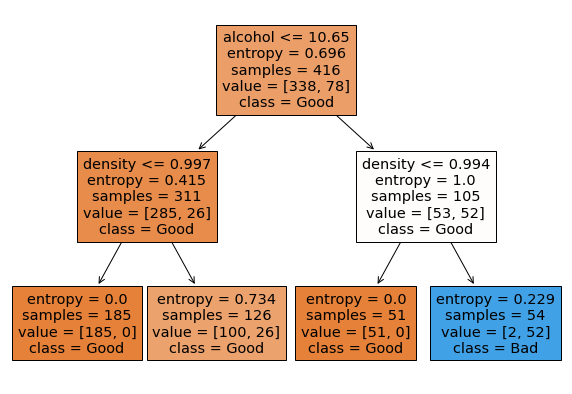

In [17]:
plt.figure(figsize = (10,7))
plot_tree(tree, feature_names = list(x), class_names= ['Good','Bad'], filled = True)
plt.show()

# With Scaling

In [18]:
x_train.sample(5)

,alcohol,density
425,10.4,0.9954
461,9.3,0.9982
261,8.9,0.9996
409,11.4,0.9917
446,12.4,0.9914


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
scaler.fit(x_train) # preprocess fit
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
x_train_scaled

array([[0.45454545, 0.34586466],
       [0.11363636, 0.36842105],
       [0.11363636, 0.96992481],
       [0.13636364, 0.46616541],
       [0.43181818, 0.34586466],
       [0.15909091, 0.63909774],
       [0.56818182, 0.12781955],
       [0.34090909, 0.45112782],
       [0.09090909, 0.46616541],
       [0.52272727, 0.15037594],
       [0.09090909, 0.54135338],
       [0.29545455, 0.61654135],
       [0.43181818, 0.15037594],
       [0.20454545, 0.54135338],
       [0.45454545, 0.59398496],
       [0.09090909, 0.54135338],
       [0.45454545, 0.13533835],
       [0.45454545, 0.30075188],
       [0.22727273, 0.4887218 ],
       [0.45454545, 0.28571429],
       [0.97727273, 0.03759398],
       [0.88636364, 0.36090226],
       [0.61363636, 0.42105263],
       [0.18181818, 0.63157895],
       [0.06818182, 0.63157895],
       [0.18181818, 0.54135338],
       [0.79545455, 0.05263158],
       [0.18181818, 0.58646617],
       [0.13636364, 0.53383459],
       [0.31818182, 0.36842105],
       [0.

In [22]:
tree = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 2
)
tree.fit(x_train_scaled,y_train)
y_predict_class = tree.predict(x_test_scaled)

In [23]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9519230769230769


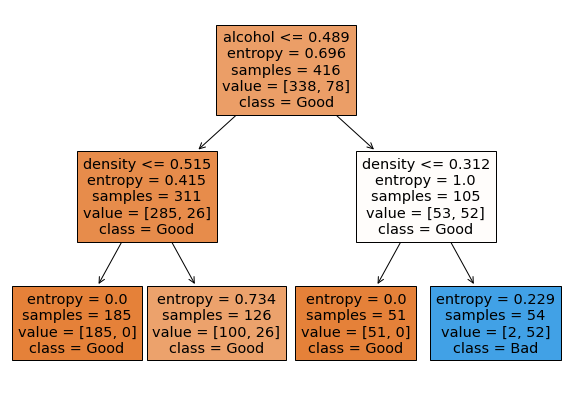

In [24]:
plt.figure(figsize = (10,7))
plot_tree(tree, feature_names = list(x), class_names = ['Good','Bad'], filled  = True)
plt.show()

## Conclusion

There is **no difference** in performance whether we applied scaling or not. Instead scaling make the tree **harder to understand because the unit of variables change**. The unit of alchohol is no longer in % and the unit in density is no longer in Kg/m^2. 

As comparison, it is easier to explain the rule in the first tree. In the first tree we can say that if there is a wine with the alcohol below 10.85 % and the density below 1.001 kg/m^2 the wine will be predicted as good quality wine. While in the second tree what we are able to say directly is if there is a wine with the standardize version of alcohol variable below 0.534 and the standardize version of density below 0.842 the wine will be predicted as good quality wine. The second one is much harder to understand.